<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis (Continue)
</div>

This is a notebook for exploring more on your dataset. You can use it with same functionality as notebook `3.0-eda.ipynb` during your exploratory data analysis process.

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [2]:
cleaned_df = pd.read_csv("../data/processed/21127021_europe_processed.csv")

In [3]:
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,2775634.0,1391086.0,1384548.0,10.813117,10.096538,9.0,26.361868,9.386339,8.456056,15.410524,...,7131.404452,19.002727,73.712777,74.398198,80.747814,95.606712,62.731991,97.748993,2022,Albania
1,2811666.0,1407212.0,1404454.0,10.240000,11.325000,9.0,21.562780,34.618040,39.186390,17.459200,...,7131.404452,19.002727,73.712777,74.087000,79.173000,97.604950,60.317581,98.223259,2021,Albania
2,2837849.0,1418585.0,1419264.0,10.285000,10.785000,9.0,20.781540,35.541970,40.169250,16.812830,...,7131.404452,44.580000,73.712777,74.632000,79.676000,100.613602,61.392578,99.468590,2020,Albania
3,2854191.0,1425363.0,1428828.0,10.343000,8.480000,9.0,20.150670,36.416850,41.600220,16.203900,...,7131.404452,40.110000,73.712777,77.168000,81.666000,104.310257,62.076092,101.720718,2019,Albania
4,2866376.0,1430495.0,1435881.0,10.517000,8.308000,9.0,19.745660,37.285730,42.271740,15.573180,...,7131.404452,37.830000,73.712777,77.037000,81.608000,107.403679,56.608871,105.708557,2018,Albania


# Question 3 <br>
- Tỉ lệ sử dụng nhân lực nữ giới trong nông nghiệp so với công nghiệp công nghiệp qua các năm ở châu Âu<br>
- Trả lời câu hỏi này ta sẽ rút ra được cái nhìn tổng thể về nguồn nhân lực là nữ giới trong quá trình phát triển kinh tế của châu Âu qua các năm và đưa ra dự đoán về tương lai. <br>
- Để trả lời câu hỏi này ta sẽ phân tích sự biến đổi của tỉ lệ nữ trong nông, công nghiệp qua các năm

### Analyzing to get the answer

In [4]:
avg_agriculture = pd.DataFrame()
avg_agriculture['value'] = cleaned_df.groupby('Year')['Female Employment in Agriculture(%)'].mean()
avg_agriculture['Year'] = avg_agriculture.index
avg_agriculture.reset_index(inplace=True, drop=True)
avg_agriculture.head()

,value,Year
0,11.942170,1995
1,11.658717,1996
2,11.384004,1997
3,11.167282,1998
4,10.920880,1999


In [5]:
avg_industry = pd.DataFrame()
avg_industry['value'] = cleaned_df.groupby("Year")["Female Employment in Industry(%)"].mean()
avg_industry['Year'] = avg_industry.index
avg_industry.reset_index(inplace=True, drop=True)
avg_industry.head()

,value,Year
0,19.007435,1995
1,18.569609,1996
2,18.204333,1997
3,18.215133,1998
4,17.604182,1999


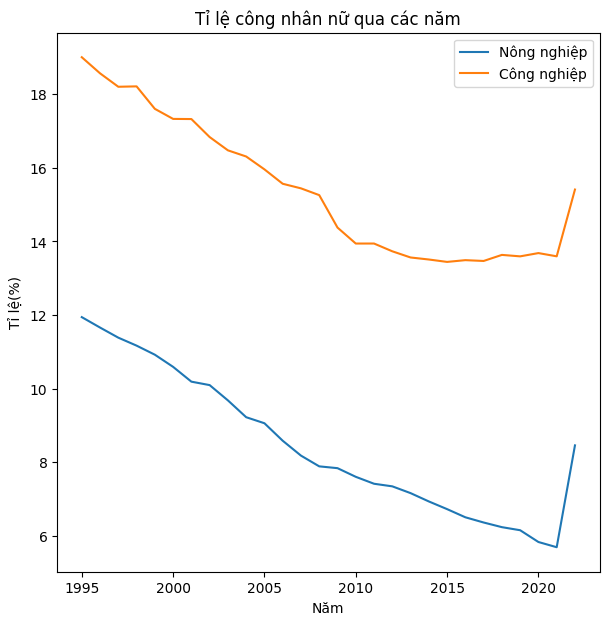

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
agriculture, = ax.plot(avg_agriculture['Year'], avg_agriculture['value'], '-')
industry, = ax.plot(avg_industry['Year'], avg_industry['value'], '-')
plt.title("Tỉ lệ công nhân nữ qua các năm")
plt.xlabel("Năm")
plt.ylabel("Tỉ lệ(%)")
ax.legend([agriculture, industry], ['Nông nghiệp', 'Công nghiệp'])
plt.show()

## Nhận xét
Ta thấy rằng tỉ lệ nhân công nữ liên tục giảm qua các năm ở cả 2 nhóm ngành công nghiệp và nông nghiệp và có xu hướng tăng đột biến trong giai đoạn 2021-2022. Dễ dàng thấy được tỉ lệ nhân công nữ ở ngành công nghiệp luôn cao hơn trong nhóm ngành nông nghiệp nhưng cả 2 vẫn chiếm rất thấp (ít hơn 20%). Chính vì thế ta có thể đưa ra kết luận rằng nam giới vẫn là lực lượng lao động chính trong 2 nhóm ngành này khi chiếm tỉ lệ lao động cao hơn hẳn so với nữ giới. Trong tương lai ta có thể đưa ra một số dự đoán như rằng tỉ lệ lao động nữ trong 2 nhóm ngành này sẽ tiếp tục giảm và thay vào đó là tỉ lệ nam giới làm nhóm ngành này tăng lên dẫn đến việc mất cân bằng giới tính trong 2 nhóm ngành kể trên.

## Question 4 <br>
- Phân tích sự tương quan giữa việc sử dụng năng lượng điện và tác động của nó lên GPD
- Trả lời câu hỏi này ta sẽ rút ra được nền kinh tế châu Âu đang phát triển theo hướng công nghiệp và nông nghiệp (những ngành tiêu thụ nhiều năng lượng) hay phát triển theo hướng những ngành dịch vụ (ít sử dụng năng lượng)/
- Để trả lời câu hỏi này ta sẽ phân tích mối tương quan giữa mức độ tiêu thụ điện năng qua và phát triển GDP qua từng năm của châu Âu.

In [7]:
avg_electronic_year = pd.DataFrame()
avg_electronic_year['Avg.Electronic per Year'] = cleaned_df.groupby('Year')['Electric Power Consumption(kWH per capita)'].mean()
avg_electronic_year['Year'] = avg_electronic_year.index
avg_electronic_year.reset_index(inplace=True, drop=True)
avg_electronic_year.head()

,Avg.Electronic per Year,Year
0,6100.505402,1995
1,6172.027420,1996
2,6283.824721,1997
3,6445.697604,1998
4,6569.394021,1999


In [8]:
avg_gdp_year = pd.DataFrame()
avg_gdp_year['Avg.GDP per Year'] = cleaned_df.groupby('Year')['GDP in USD'].mean()
avg_gdp_year['Year'] = avg_gdp_year.index
avg_gdp_year.reset_index(inplace=True, drop=True)
avg_gdp_year.head()

,Avg.GDP per Year,Year
0,2.856850e+11,1995
1,2.909165e+11,1996
2,2.759371e+11,1997
3,2.735741e+11,1998
4,2.629153e+11,1999


Vì ta chỉ xét sự tăng trưởng của GDP qua các năm chứ không đề cập đến giá trị của nó nên ta sẽ thay đổi lại đơn vị đo cho GDP vì nếu không thay đổi thì giá trị GDP sẽ rất lớn so với lượng tiêu thụ điện năng và sẽ gây khó khăn cho việc trực quan. Ở bài toán này ta sẽ thay đổi đơn vị từ USD sang hundred million USD.

In [9]:
avg_gdp_year['Avg.GDP per Year'] = avg_gdp_year['Avg.GDP per Year'] / 100000000
avg_gdp_year.head()

,Avg.GDP per Year,Year
0,2856.849559,1995
1,2909.165151,1996
2,2759.370719,1997
3,2735.740858,1998
4,2629.153013,1999


### Trực quan hóa dữ liệu

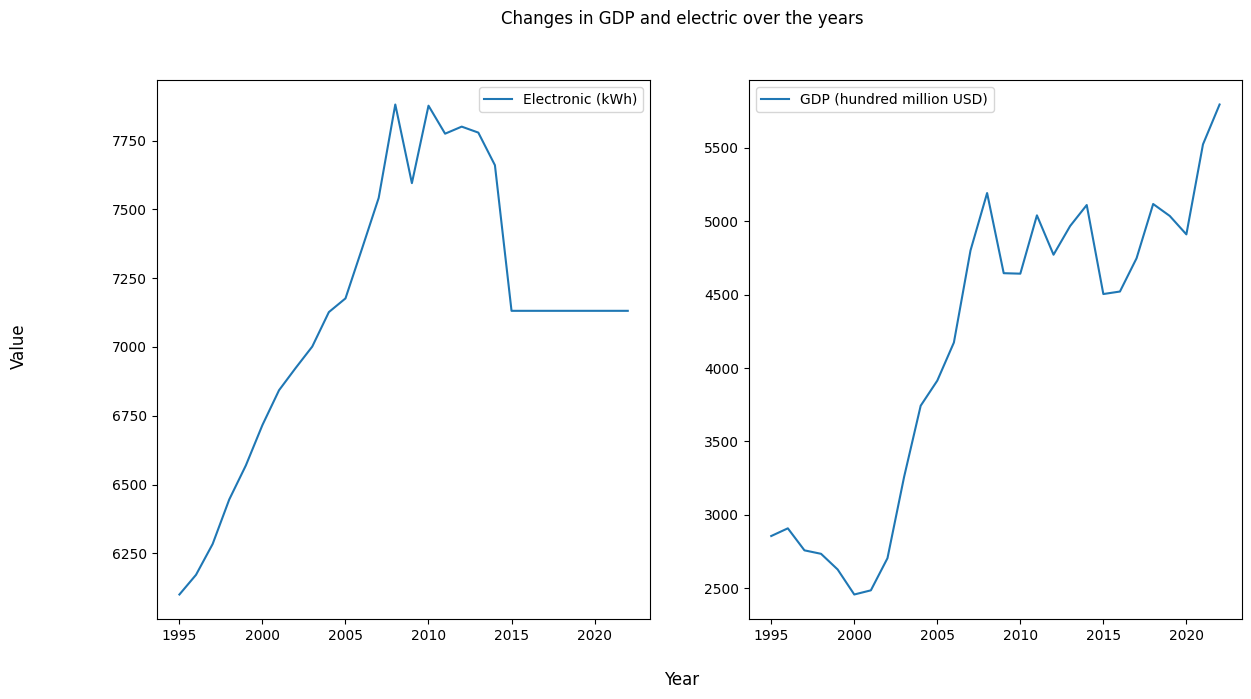

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(14, 7))
fig.suptitle("Changes in GDP and electric over the years")
fig.supxlabel("Year")
fig.supylabel("Value")
electronic, = ax1.plot(avg_electronic_year['Year'], avg_electronic_year['Avg.Electronic per Year'])
gdp, = ax2.plot(avg_gdp_year['Year'], avg_gdp_year['Avg.GDP per Year'])
ax1.legend([electronic], ['Electronic (kWh)'])
ax2.legend([gdp], ['GDP (hundred million USD)'])

plt.show()

### Nhận xét <br>
Về mặt tổng thể ta có thể thấy tương quan chung giữa việc sử dụng năng lượng điện và mức thu nhập GDP của châu Âu có xu hướng tăng rất mạnh trong giai đoạn 1995 đến 2008 trong đó về mặt GDP có đợt giảm nhẹ trong khoảng 1996 đến 2000. Trong giai đoạn 2008 đến 2022, ta có thể thấy mức xử dụng năng lượng điện có xu hướng đi ngang và giảm mạnh trong khi GDP đi ngang và tăng lên trong giai đoạn 2021 đến 2022. Từ đó ta có thể kết luận về sự chuyển dịch tỉ trọng của nền kinh tế đang từ các ngành tiêu thụ nhiều điện (như các ngành công nghiệp nặng) sang các ngành ít tiêu thụ điện hơn (như phát triển về du lịch, dịch vụ). Điều này có thể dự báo trong tương lai, GDP của châu Âu có xu hướng tăng trưởng nhẹ trong khi mức sử dụng điện có thể tiếp tục giảm. Nói cách khác trong tương lai gần châu Âu có thể dịch chuyển tỉ trọng nền kinh tế từ các ngành tiêu thụ nhiều điện qua các ngành tiêu thụ ít điện và mức tăng GDP sẽ chậm hơn hoặc không đổi.

## Question 5
- Xu hướng chuyển dịch nguồn cung cấp năng lượng, năng lượng hóa thạch và năng lượng tái tạo qua từng năm ở châu Âu
- Phân tích câu hỏi này ta sẽ trả lời được tình hình sử dụng năng lượng hiện nay ở ở châu Âu, xu hướng chuyển dịch tỉ trọng năng lượng và dự đoán sự dịch chuyển tỉ trọng trong tương lai.
- Để trả lời câu hỏi này ta sẽ phân tích sự biến động của tỉ lệ đóng góp ở 2 nguồn năng lượng là năng lượng hóa thạch và năng lượng tái tạo qua các năm.

In [11]:
fossil_fuel_consumption = pd.DataFrame()
fossil_fuel_consumption['Avg.Fossil fuel per Year'] = cleaned_df.groupby('Year')['Fossil Fuel Consumption (%)'].mean()
fossil_fuel_consumption['Year'] = fossil_fuel_consumption.index
fossil_fuel_consumption.reset_index(inplace=True, drop = True)
fossil_fuel_consumption.head(5)

,Avg.Fossil fuel per Year,Year
0,75.643914,1995
1,75.682465,1996
2,75.671436,1997
3,75.784847,1998
4,75.827458,1999


In [12]:
renewable_energy_consumption = pd.DataFrame()
renewable_energy_consumption['Avg.Renewable energy per Year'] = cleaned_df.groupby('Year')['Renewable Energy Consumption (%)'].mean()
renewable_energy_consumption['Year'] = renewable_energy_consumption.index
renewable_energy_consumption.reset_index(inplace=True, drop = True)
renewable_energy_consumption.head(5)

,Avg.Renewable energy per Year,Year
0,15.657136,1995
1,15.447136,1996
2,15.722386,1997
3,15.747636,1998
4,15.840636,1999


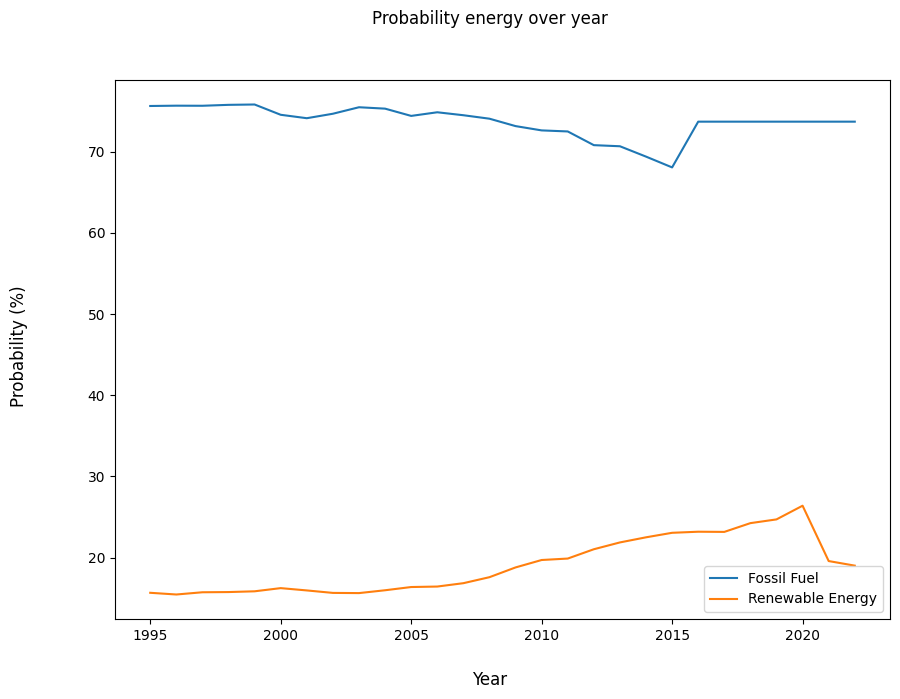

In [13]:
fig, ax = plt.subplots(figsize = (10, 7))
fossil, = ax.plot(fossil_fuel_consumption['Year'], fossil_fuel_consumption["Avg.Fossil fuel per Year"])
renewable, = ax.plot(renewable_energy_consumption['Year'], renewable_energy_consumption["Avg.Renewable energy per Year"])
fig.suptitle("Probability energy over year")
fig.supxlabel("Year")
fig.supylabel("Probability (%)")
ax.legend([fossil, renewable], ['Fossil Fuel', 'Renewable Energy'])
plt.show()

### Nhận xét <br>
Ta có thể thấy răng tỉ lệ sử dụng năng lượng hóa thạch luôn cao hơn rất nhiều so với tỉ lệ sử dụng năng lượng tái tạo. Lí do có thể do sự tiện dụng và tính ổn định cũng như thói quen sử dụng gây nên. Theo dữ liệu thu được ta có thể đưa ra cái nhìn khái quát đầu tiên trong giai đoạn 1995 đến 2015 mức độ sử dụng năng lượng hóa thạch giảm trong khi mức độ sử dụng năng lượng tái tạo tăng nhẹ. Sự khác biệt đầu tiên xảy ra trong giai đoạn 2015 đến 2020 tỉ lệ sử dụng năng lượng hóa thạch đột nhiên tăng mạnh tại năm 2016 và đi ngang đến hết năm 2020 trong khi tỉ lệ sử dụng năng lượng tái tạo vẫn tiếp tục được ghi nhận tăng ổn định và có phần mạnh hơn một chút so với giai đoạn trước. Từ giai đoạn 2020 đến 2022, ta có thể thấy tỉ lệ sử dụng năng lượng hóa thạch vẫn đi ngang trong khi mức độ sử dụng năng lượng tái tạo sụt giảm mạnh. Điều này có thể đến từ các quốc gia châu Âu thúc đẩy kinh tế trong giai đoạn này (các phân tích ở câu hỏi trước) nên thay vì sử dụng một nguồn năng lượng không ổn định như năng lượng tái tạo thì dịch chuyển mạnh sang năng lượng hóa thạch. Dự đoán trong tương lai gần các quốc gia châu Âu vẫn đang muốn kéo đà tăng trưởng GDP nên có thể tỉ lệ sử dụng năng lượng hóa thạch sẽ được giữ nguyên hoặc có thể tăng nhẹ, trong khi các nguồn năng lượng tái tạo có thể giảm đi do sự bất tiện và tính thiếu hiệu quả nó gây nên.

## Question 6
- Sự đóng góp của ngành nông nghiệp vào tổng GDP quốc gia hiện nay được thể hiện như thế nào?
- Trả lời được câu hỏi này ta có thể kết luận được giá trị ngành nông nghiệp ở châu Âu và xu hướng phát triển ngành nghề này trong tương lai.
- Để trả lời được câu hỏi này ta sẽ phân tích tỉ lệ giá trị gia tăng trong nông nghiệp so với tổng GDP của các quốc gia hiện nay.

In [18]:
value_added = pd.DataFrame()
value_added['Avg.Agriculture value added'] = cleaned_df.groupby('Country')['Agriculture value added(in USD)'].mean()
value_added['Country'] = value_added.index
value_added.reset_index(inplace=True, drop = True)
value_added = value_added.sort_values('Avg.Agriculture value added', ascending=False)
value_added.head(5)

,Avg.Agriculture value added,Country
12,3.921350e+10,France
19,3.826455e+10,Italy
35,3.183010e+10,Spain
13,2.705065e+10,Germany
39,1.679094e+10,United Kingdom


In [23]:
gdp_country = pd.DataFrame()
gdp_country['Avg.GDP in USD'] = cleaned_df.groupby('Country')['GDP in USD'].mean()
gdp_country["Country"] = gdp_country.index
gdp_country.reset_index(inplace=True, drop=True)

gdp_country.sort_values('Avg.GDP in USD', ascending=False, inplace=True)
gdp_country.head(5)

,Avg.GDP in USD,Country
13,3.155095e+12,Germany
39,2.414933e+12,United Kingdom
12,2.283673e+12,France
19,1.802831e+12,Italy
35,1.130005e+12,Spain


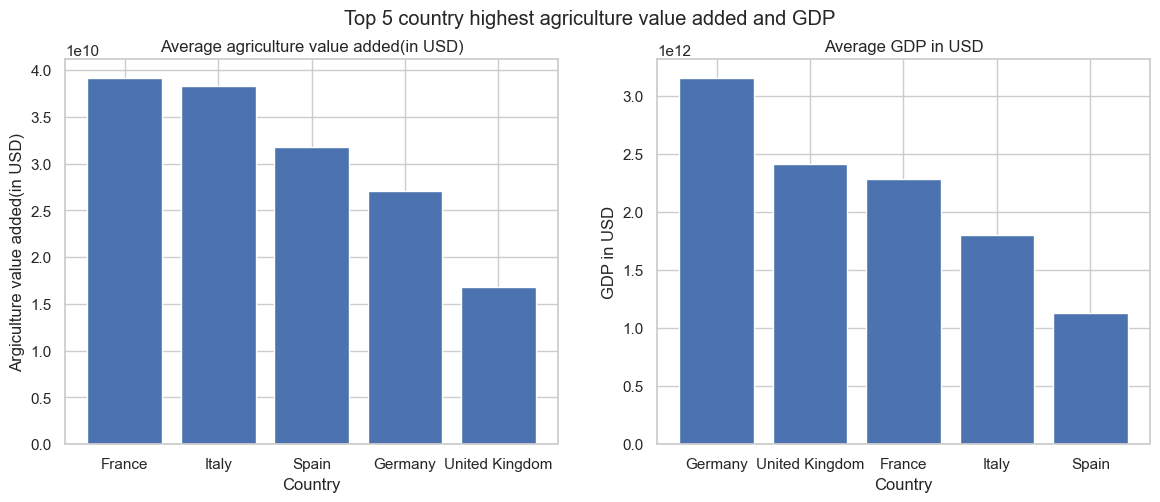

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.set(style = "whitegrid")
fig.suptitle("Top 5 country highest agriculture value added and GDP")
ax1.set_title("Average agriculture value added(in USD)")
ax1.set_ylabel("Argiculture value added(in USD)")
ax1.set_xlabel("Country")
ax1.bar(value_added.head(5)['Country'], value_added.head(5)['Avg.Agriculture value added'])

ax2.set_title("Average GDP in USD")
ax2.set_xlabel("Country")
ax2.set_ylabel("GDP in USD")
ax2.bar(gdp_country.head(5)["Country"], gdp_country.head(5)['Avg.GDP in USD'])
plt.show()

### Nhận xét <br>
Theo như biểu đồ, ta nhận xét rằng trong top 5 quốc gia có GDP trung bình cao nhất châu Âu, quốc gia nào có GDP trung bình cao hơn thường có giá trị gia tăng trong ngành nông nghiệp thấp hơn. Điển hình cho nhận định này là nước Đức khi GDP trung bình đứng thứ 1 tại châu Âu nhưng giá trị gia tăng ngành nông nghiệp chỉ đứng thứ 4, sau đó là nước Anh cũng có đặc điểm như vậy khi GDP đứn thứ 2 nhưng đóng góp của ngành nông nghiệp vào GDP chỉ đứng thứ 5. Từ nhận định đó ta có thể kết luận được rằng ngành nông nghiệp không đóng góp nhiều lắm vào GDP quốc gia các nước châu Âu. Thay vào đó các quốc gia này phát triển những ngành mang lại lợi nhuận cao hơn như công nghiệp hoặc dịch vụ. Sau kết luận này ta sẽ xem kĩ hơn tỉ lệ đóng góp của giá trị gia tăng ngành nông nghiệp so với tổng thế GDP quốc gia.

In [41]:
ratio = pd.DataFrame()
index_sort = value_added.head(5)['Country']

ratio['Country'] = index_sort
ratio['Value'] = value_added.head(5).sort_values('Country')['Avg.Agriculture value added'] / gdp_country.head(5).sort_values('Country')['Avg.GDP in USD'] * 100
ratio.head()

,Country,Value
12,France,1.717124
19,Italy,2.122470
35,Spain,2.816810
13,Germany,0.857364
39,United Kingdom,0.695296


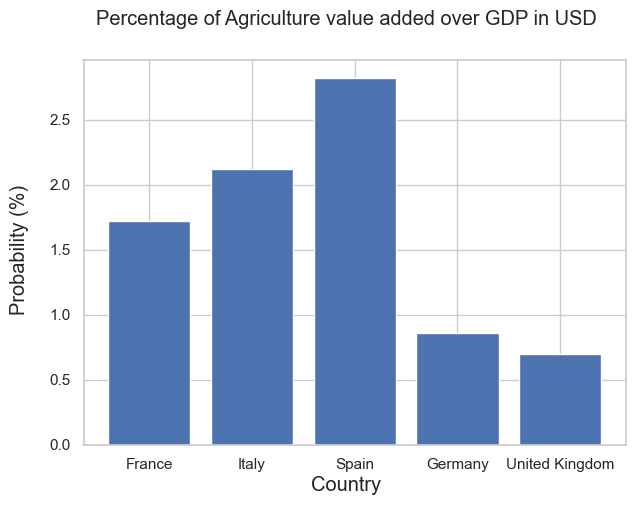

In [44]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle("Percentage of Agriculture value added over GDP in USD")
fig.supxlabel("Country")
fig.supylabel("Probability (%)")
ax.bar(ratio["Country"], ratio["Value"])

plt.show()

### Nhận xét <br>
Theo như đồ thị ta có thể thấy tỉ lệ đóng góp của giá trị gia tăng ngành nông nghiệp vào tổng GDP quốc gia luôn ở mức rất thấp với giá trị cao nhất nằm ở nước Tây Ban Nha chỉ 2.8%. Do đó ta có thể kết luận châu Âu không tập trung phát vào mảng nông nghiệp mà ở các ngành nghề khác. Mặc dù Tây Ban Nha có tỉ trọng ngành nông nghiệp cao nhất nhưng GDP của họ lại thấp nhất trong top 5 cho thấy rằng ngành nông nghiệp này mang lại ít giá trị hơn các ngành khác. Từ đó ta có thể đưa ra dự đoán trong tương lai các nước châu Âu vẫn tiếp tục phát triển ít tập trung ở nhóm ngành nông nghiệp mà sẽ tập trung hơn vào các nhóm ngành khác để đảm bảo đà tăng trưởng GDP.